# **FINAL PIPELINE :**

We build the end pipeline where given an image we predict the ***target class percentage*** and if it is ***more than 50%*** we pass the image through the segmentation model to get the mask.

In [ ]:
# Mounting the Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
train_png_dest = '/content/Pneumothorax/Train_Dataset/siim'


if not os.path.isdir(train_png_dest):
    os.makedirs(train_png_dest)

In [ ]:
%cd /content/drive/MyDrive/Self \Case \Study \2

/content/drive/MyDrive/Self Case Study 2


In [ ]:
!ls

 Airbnb_EDA_FE.ipynb			  'test_png_images (1).zip'
 DATASET				   test_png_images.zip
 Final_pipeline_Pneumothorax.ipynb	   train_dicom_images.zip
 harshjadhav100_Model_PneumoThorax.ipynb   train_mask_png_images.zip
 test_dicom_images.zip			   train_png_images.zip


In [ ]:
!unzip train_png_images.zip -d /content/Pneumothorax/Train_Dataset/siim/

Streaming output truncated to the last 5000 lines.
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_png_images/1.2.276.0.7230010.3.1.4.8323329.2301.1517875172.7308.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_png_images/1.2.276.0.7230010.3.1.4.8323329.31902.1517875157.405933.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_png_images/1.2.276.0.7230010.3.1.4.8323329.32761.1517875162.229147.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_png_images/1.2.276.0.7230010.3.1.4.8323329.32307.1517875159.806079.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_png_images/1.2.276.0.7230010.3.1.4.8323329.5228.1517875187.95605.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_png_images/1.2.276.0.7230010.3.1.4.8323329.12753.1517875241.648215.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_png_images/1.2.276.0.7230010.3.1.4.8323329.6107.1517875196.576812.png  
  inflating: /content/Pn

In [ ]:
!unzip train_mask_png_images.zip -d /content/Pneumothorax/Train_Dataset/siim/

Streaming output truncated to the last 5000 lines.
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_mask_png_images/1.2.276.0.7230010.3.1.4.8323329.2653.1517875173.887747_mask.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_mask_png_images/1.2.276.0.7230010.3.1.4.8323329.4978.1517875185.811736_mask.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_mask_png_images/1.2.276.0.7230010.3.1.4.8323329.5763.1517875190.209859_mask.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_mask_png_images/1.2.276.0.7230010.3.1.4.8323329.2686.1517875174.57880_mask.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_mask_png_images/1.2.276.0.7230010.3.1.4.8323329.13322.1517875244.666217_mask.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_mask_png_images/1.2.276.0.7230010.3.1.4.8323329.14019.1517875249.167451_mask.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_mask_png_images/1.2.276.0.7230010.3.

In [ ]:
!unzip test_png_images.zip -d /content/Pneumothorax/Train_Dataset/siim/

Archive:  test_png_images.zip
  inflating: /content/Pneumothorax/Train_Dataset/siim/test_png_images/ID_f4f13fb70.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/test_png_images/ID_462c2c75d.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/test_png_images/ID_bd4fa896c.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/test_png_images/ID_30aa587f1.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/test_png_images/ID_f1b5e5378.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/test_png_images/ID_3addad7e1.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/test_png_images/ID_01fe90211.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/test_png_images/ID_5dc70172e.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/test_png_images/ID_fa9d76d07.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/test_png_images/ID_a41a547f0.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/test_png_images/ID_7ad4150

In [ ]:
!cp "/content/drive/MyDrive/Self Case Study 2/DATASET/Train Dataset/siim/final_train_data.csv" "/content/Pneumothorax/Train_Dataset/siim/"

In [ ]:
# Installing pydicom

!pip install pydicom

     |████████████████████████████████| 1.9MB 15.6MB/s 


In [ ]:
#installing the libraries:

import pandas as pd
import numpy as np
import pydicom
from glob import glob
import glob2
from tqdm import tqdm
import shutil
import os
import pydicom
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import warnings
from joblib import Parallel, delayed
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import tensorflow as tf
import keras
# tf.enable_eager_execution()
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
# from hilbert import hilbertCurve
import imgaug.augmenters as iaa
import numpy as np
import random as rn
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau, Callback
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# import tensorflow.keras.applications.efficientnet as efn
from tensorflow.keras import Sequential
from keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import densenet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, AveragePooling2D

from tensorflow import reduce_sum
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPool2D, Dropout, concatenate, Flatten
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split

In [ ]:
from skimage.transform import resize
import tensorflow as tf
import keras.backend as K
from keras.losses import binary_crossentropy

from keras.preprocessing.image import load_img
from keras import Model
from keras.callbacks import  ModelCheckpoint
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization
from tqdm import tqdm_notebook
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.utils import conv_utils
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras.engine import InputSpec
from keras import backend as K
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.losses import binary_crossentropy
import keras.callbacks as callbacks
from keras.callbacks import Callback
from keras.applications.xception import Xception
from keras.layers import multiply


from keras import optimizers
#from keras.legacy import interfaces
from keras.utils.generic_utils import get_custom_objects

from keras.engine.topology import Input
from keras.engine.training import Model
from keras.layers.convolutional import Conv2D, UpSampling2D, Conv2DTranspose
from keras.layers.core import Activation, SpatialDropout2D
from keras.layers.merge import concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers import Input,Dropout,BatchNormalization,Activation,Add
from keras.regularizers import l2
from keras.layers.core import Dense, Lambda
from keras.layers.merge import concatenate, add
from keras.layers import GlobalAveragePooling2D, Reshape, Dense, multiply, Permute
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

import glob
import shutil
import os
import random
from PIL import Image

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Thu Apr  1 16:00:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%cd /content/Pneumothorax/

/content/Pneumothorax


***Getting the Data:***

In [ ]:
final_train_df = pd.read_csv('Train Dataset/siim/final_train_data.csv')
final_train_df.head(2)

,ImageId,EncodedPixels,ImagePath,MaskPath,ImagePath_Png
0,1.2.276.0.7230010.3.1.4.8323329.6904.151787520...,-1,Train Dataset/siim/train_dicom_images/1.2.276....,Train Dataset/siim/train_mask_png_images/1.2.2...,Train Dataset/siim/train_png_images/1.2.276.0....
1,1.2.276.0.7230010.3.1.4.8323329.13666.15178752...,557374 2 1015 8 1009 14 1002 20 997 26 990 32 ...,Train Dataset/siim/train_dicom_images/1.2.276....,Train Dataset/siim/train_mask_png_images/1.2.2...,Train Dataset/siim/train_png_images/1.2.276.0....


***Defining Classification Architecture :***

In [ ]:
##https://www.kaggle.com/danofer/ranzcr-chexnet-starter
#Creating the model:

#Defining the model:
base_model = densenet.DenseNet121(weights = None, include_top=False, input_shape=(256,256,3))

#Adding a dummy layer so that pre-trained weights can be loaded properly. This dummy layer is removed later
predictions = tf.keras.layers.Dense(14,activation='sigmoid', name='predictions')(base_model.output)

base_model2 = tf.keras.Model(inputs = base_model.input, outputs = predictions)

#Loading the pre-trained chexnet weights
base_model2.load_weights('/content/drive/MyDrive/Self Case Study 2/DATASET/brucechou1983_CheXNet_Keras_0.3.0_weights.h5')

#Removing the dummy layer
base_model2.layers.pop()

#Freezing the model
#base_model2.trainable = False

#Adding a pooling layer 
new_base_model = tf.keras.layers.GlobalAveragePooling2D()(base_model2.layers[-3].output)

new_base_model = tf.keras.layers.Dense(1024, activation='relu')(new_base_model)
new_base_model = tf.keras.layers.BatchNormalization()(new_base_model)
new_base_model = tf.keras.layers.Dropout(0.4)(new_base_model)

new_base_model = tf.keras.layers.Dense(512, activation='relu')(new_base_model)
new_base_model = tf.keras.layers.BatchNormalization()(new_base_model)
new_base_model = tf.keras.layers.Dropout(0.4)(new_base_model)

new_base_model = tf.keras.layers.Dense(64, activation='relu')(new_base_model)

#Adding the final Dense layer for prediction
new_base_model = tf.keras.layers.Dense(1, activation='sigmoid')(new_base_model)

#Model built
final_classify_model = tf.keras.Model(base_model2.input, new_base_model)

In [ ]:
#Displaying the model:

final_classify_model.summary(line_length = 150)

Model: "model_1"
______________________________________________________________________________________________________________________________________________________
Layer (type)                                     Output Shape                     Param #           Connected to                                      
input_1 (InputLayer)                             [(None, 256, 256, 3)]            0                                                                   
______________________________________________________________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)                   (None, 262, 262, 3)              0                 input_1[0][0]                                     
______________________________________________________________________________________________________________________________________________________
conv1/conv (Conv2D)                              (None, 128, 128, 64)        

In [ ]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

#Adam optimizer
optim = tf.keras.optimizers.Adam(0.0001)

#Compile the model:
final_classify_model.compile(optimizer=optim,loss='binary_crossentropy',metrics=[METRICS])

In [ ]:
final_classify_model.inputs, final_classify_model.outputs

([<KerasTensor: shape=(None, 256, 256, 3) dtype=float32 (created by layer 'input_1')>],
 [<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_3')>])

In [ ]:
final_classify_model.load_weights("/content/drive/MyDrive/Self Case Study 2/DATASET/chexnet_model_new.h5")
print('Classification Model Loaded....')

Classification Model Loaded....


***Defining Segmentation Architecture :***

In [ ]:
##https://harshjadhav100.medium.com/siim-acr-pneumothorax-segmentation-d92af3086b51

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications import *

def squeeze_excite_block(inputs, ratio=8):
    init = inputs
    channel_axis = 1
    filters = init.shape[channel_axis]
    se_shape = (filters, 1, 1)

    se = GlobalAveragePooling2D(data_format='channels_first')(init)
    # se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)
    se = Reshape(se_shape)(se)
    print(se.shape)

    x = Multiply()([init, se])
    return x

def conv_block(inputs, filters):
    x = inputs

    x = Conv2D(filters, (3, 3), padding="same",data_format='channels_first')(x)
    x = BatchNormalization(axis=1)(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, (3, 3), padding="same",data_format='channels_first')(x)
    x = BatchNormalization(axis=1)(x)
    x = Activation('relu')(x)

    x = squeeze_excite_block(x)

    return x

def encoder1(inputs):
    skip_connections = []

    model = VGG19(include_top=False, weights='imagenet', input_tensor=inputs, input_shape=(3,256,256))
    # names = ["block1_conv2", "block2_conv2", "block3_conv4", "block4_conv4"]
    names = [ "block1_conv2", "block2_conv2"]
    for name in names:
        skip_connections.append(model.get_layer(name).output)

    # output = model.get_layer("block5_conv4").output
    output = model.get_layer("block3_conv4").output
    # print("<<VGG19")
    # for v in range(len(skip_connections)):
    #     print(skip_connections[v].shape)
    # print("VGG19>>")
    return output, skip_connections

def decoder1(inputs, skip_connections):
    # num_filters = [256, 128, 64, 32]
    num_filters = [64, 32]
    skip_connections.reverse()
    
    x = inputs

    for i, f in enumerate(num_filters):
        # x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = UpSampling2D((2, 2), interpolation='bilinear',data_format='channels_first')(x)
        # print(x.shape, skip_connections[i].shape)
        x = Concatenate(axis=1)([x, skip_connections[i]])
        x = conv_block(x, f)

    return x

# def encoder2(inputs):
#     skip_connections = []
#
#     output = DenseNet121(include_top=False, weights='imagenet')(inputs)
#     model = tf.keras.models.Model(inputs, output)
#
#     names = ["input_2", "conv1/relu", "pool2_conv", "pool3_conv"]
#     for name in names:
#         skip_connections.append(model.get_layer(name).output)
#     output = model.get_layer("pool4_conv").output
#
#     return output, skip_connections

def encoder2(inputs):
    # num_filters = [32, 64, 128, 256]
    num_filters = [32, 64]
    skip_connections = []
    x = inputs

    for i, f in enumerate(num_filters):
        x = conv_block(x, f)
        skip_connections.append(x)
        x = MaxPool2D((2, 2),data_format='channels_first')(x)

    return x, skip_connections

def decoder2(inputs, skip_1, skip_2):
    # num_filters = [256, 128, 64, 32]
    num_filters = [256, 128]
    skip_2.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2), interpolation='bilinear',data_format='channels_first')(x)
        x = Concatenate(axis=1)([x, skip_1[i], skip_2[i]])
        x = conv_block(x, f)

    return x

def output_block(inputs):
    x = Conv2D(1, (1, 1), padding="same",data_format='channels_first')(inputs)
    x = Activation('sigmoid')(x)
    return x

def Upsample(tensor, size):
    """Bilinear upsampling"""
    def _upsample(x, size):
        return tf.image.resize(images=x, size=size)
    return Lambda(lambda x: _upsample(x, size), output_shape=size)(tensor)

def ASPP(x, filter):
    shape = x.shape

    y1 = AveragePooling2D(pool_size=(shape[2], shape[3]),data_format='channels_first')(x)
    y1 = Conv2D(filter, 1, padding="same",data_format='channels_first')(y1)
    y1 = BatchNormalization(axis=1)(y1)
    y1 = Activation("relu")(y1)
    y1 = UpSampling2D((shape[2], shape[3]), interpolation='bilinear',data_format='channels_first')(y1)

    y2 = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False,data_format='channels_first')(x)
    y2 = BatchNormalization(axis=1)(y2)
    y2 = Activation("relu")(y2)

    y3 = Conv2D(filter, 3, dilation_rate=6, padding="same", use_bias=False,data_format='channels_first')(x)
    y3 = BatchNormalization(axis=1)(y3)
    y3 = Activation("relu")(y3)

    y4 = Conv2D(filter, 3, dilation_rate=12, padding="same", use_bias=False,data_format='channels_first')(x)
    y4 = BatchNormalization(axis=1)(y4)
    y4 = Activation("relu")(y4)

    y5 = Conv2D(filter, 3, dilation_rate=18, padding="same", use_bias=False,data_format='channels_first')(x)
    y5 = BatchNormalization(axis=1)(y5)
    y5 = Activation("relu")(y5)

    y = Concatenate(axis=1)([y1, y2, y3, y4, y5])

    y = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False,data_format='channels_first')(y)
    y = BatchNormalization(axis=1)(y)
    y = Activation("relu")(y)

    return y

def build_model(shape):
    inputs = Input(shape)
    x, skip_1 = encoder1(inputs)
    x = ASPP(x, 64)
    x = decoder1(x, skip_1)
    outputs1 = output_block(x)

    x = inputs * outputs1

    x, skip_2 = encoder2(x)
    x = ASPP(x, 64)
    x = decoder2(x, skip_1, skip_2)
    outputs2 = output_block(x)
    outputs = Concatenate(axis=1)([outputs1, outputs2])

    model = Model(inputs, outputs)
    return model

In [ ]:
K.set_image_data_format('channels_first')
inp_shape = (3,256,256)
final_segment_model = build_model(inp_shape)
final_segment_model.summary()

80142336/80134624 [==============================] - 1s 0us/step
(None, 64, 1, 1)
(None, 32, 1, 1)
(None, 32, 1, 1)
(None, 64, 1, 1)
(None, 256, 1, 1)
(None, 128, 1, 1)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 3, 256, 256) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 64, 256, 256) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 64, 256, 256) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPoolin

In [ ]:
final_segment_model.inputs, final_segment_model.outputs

([<KerasTensor: shape=(None, 3, 256, 256) dtype=float32 (created by layer 'input_2')>],
 [<KerasTensor: shape=(None, 2, 256, 256) dtype=float32 (created by layer 'concatenate_6')>])

In [ ]:
# Load the saved segmentation model :
final_segment_model.load_weights('/content/drive/MyDrive/Self Case Study 2/DATASET/best_Double_Unet.hdf5')
print("Segmentation Model Loaded...")

Segmentation Model Loaded...


In [ ]:
def read_image(path):
    
    x = tf.io.read_file(path)
    x = tf.image.decode_png(x, channels=3)
    x = tf.image.convert_image_dtype(x, tf.float32)

    return x

def classify_decode(path):
    file_bytes = tf.io.read_file(path)
    img = tf.image.decode_png(file_bytes, channels=3)
    img = tf.cast(img, tf.float32) / 255.0

    return img

***Final Predict Function :***

In [113]:
def Predict(final_classify_model,final_segment_model, image_path):
    """
    This function predicts the classfication output and if it is greater than 0.5 it passes the image to the segmentation model.
    ------------------------------------------------------------------
    final_classify_model      : saved classification model instance
    final_segment_model       : saved segmentation model instance
    image_path                : image path
    ------------------------------------------------------------------
    """

     # read the original image
    image_orig = classify_decode(image_path)
    
    #get the classification output
    classify_output = final_classify_model.predict(tf.expand_dims(image_orig, axis=0))
    confidence = classify_output

    # checking the threshold:
    if confidence > 0.5:
        print('Pneumothorax Found..!!')
        print('Classifier Prediction Confidence : {}%'.format(classify_output*100))

        # read the original image
        image_seg = read_image(image_path)

        # reshape image and mask as first channel image format
        image = tf.transpose(image_seg, [2,0,1])

        # get the segmented output
        predicted_mask = final_segment_model.predict(tf.expand_dims(image, axis=0))

        #Re-arranging the dimensions for displaying the mask
        predicted_mask = tf.transpose(predicted_mask, [0,2,3,1])
        plt.imshow(image_seg)      
        plt.imshow(np.squeeze(predicted_mask[:,:,:,1]), cmap='Reds', alpha = 0.3)
    else:
        print('No Pneumothorax Detection...!')
        no_confidence = 1 - classify_output
        print('Classifier Prediction Confidence : {}%'.format(no_confidence*100))
        
        # read the original image
        image_seg1 = read_image(image_path)
        plt.imshow(image_seg1)




***Checking with some train images:***

4
Pneumothorax Found..!!
Classifier Prediction Confidence : [[99.66582]]%


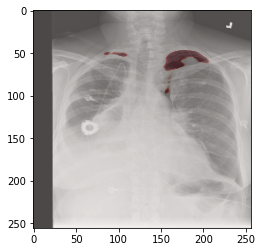

In [ ]:
rand_id = np.random.randint(len(final_train_df))
print(rand_id)
image_path = final_train_df['ImagePath_Png'].values[rand_id]
Predict(final_classify_model,final_segment_model, image_path)

9606
No Pneumothorax Detection...!
Classifier Prediction Confidence : [[99.999985]]%


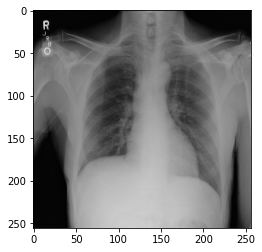

In [117]:
rand_id = np.random.randint(len(final_train_df))
print(rand_id)
image_path = final_train_df['ImagePath_Png'].values[rand_id]
Predict(final_classify_model,final_segment_model, image_path)

9606
No Pneumothorax Detection...!
Classifier Prediction Confidence : [[99.999985]]%


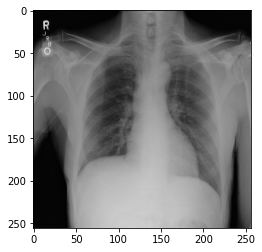

In [114]:
rand_id = np.random.randint(len(final_train_df))
print(rand_id)
image_path = final_train_df['ImagePath_Png'].values[rand_id]
Predict(final_classify_model,final_segment_model, image_path)

7693
No Pneumothorax Detection...!
Classifier Prediction Confidence : [[99.95897]]%


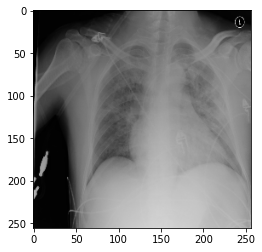

In [115]:
rand_id = np.random.randint(len(final_train_df))
print(rand_id)
image_path = final_train_df['ImagePath_Png'].values[rand_id]
Predict(final_classify_model,final_segment_model, image_path)

11
No Pneumothorax Detection...!
Classifier Prediction Confidence : [[99.994026]]%


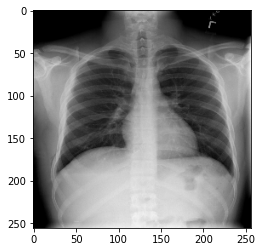

In [116]:
rand_id = np.random.randint(len(final_train_df))
print(rand_id)
image_path = final_train_df['ImagePath_Png'].values[rand_id]
Predict(final_classify_model,final_segment_model, image_path)

3
Pneumothorax Found..!!
Classifier Prediction Confidence : [[99.99088]]%


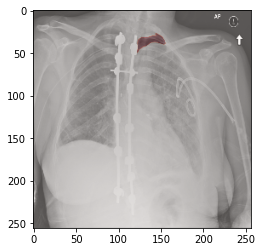

In [ ]:
rand_id = np.random.randint(len(final_train_df))
print(rand_id)
image_path = final_train_df['ImagePath_Png'].values[rand_id]
Predict(final_classify_model,final_segment_model, image_path)

3700
Pneumothorax Found..!!
Classifier Prediction Confidence : [[99.99252]]%


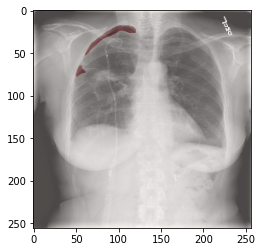

In [ ]:
rand_id = np.random.randint(len(final_train_df))
print(rand_id)
image_path = final_train_df['ImagePath_Png'].values[rand_id]
Predict(final_classify_model,final_segment_model, image_path)

1
Pneumothorax Found..!!
Classifier Prediction Confidence : [[99.99568]]%


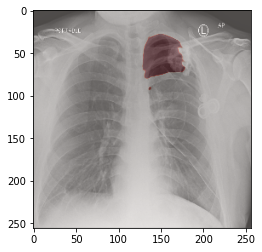

In [ ]:
rand_id = np.random.randint(len(final_train_df))
print(rand_id)
image_path = final_train_df['ImagePath_Png'].values[rand_id]
Predict(final_classify_model,final_segment_model, image_path)

5419
Pneumothorax Found..!!
Classifier Prediction Confidence : [[99.6963]]%


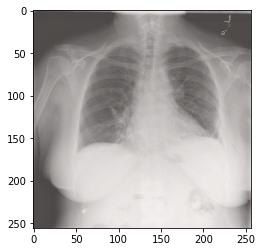

In [ ]:
rand_id = np.random.randint(len(final_train_df))
print(rand_id)
image_path = final_train_df['ImagePath_Png'].values[rand_id]
Predict(final_classify_model,final_segment_model, image_path)

1920
No Pneumothorax Detection...!
Classifier Prediction Confidence : [[100.]]%


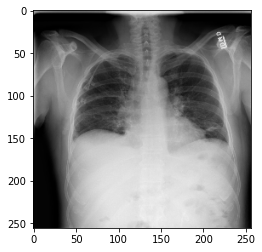

In [118]:
rand_id = np.random.randint(len(final_train_df))
print(rand_id)
image_path = final_train_df['ImagePath_Png'].values[rand_id]
Predict(final_classify_model,final_segment_model, image_path)

3961
No Pneumothorax Detection...!
Classifier Prediction Confidence : [[99.99813]]%


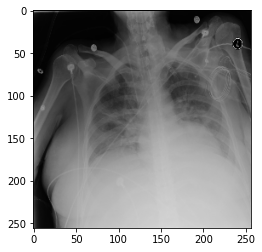

In [119]:
rand_id = np.random.randint(len(final_train_df))
print(rand_id)
image_path = final_train_df['ImagePath_Png'].values[rand_id]
Predict(final_classify_model,final_segment_model, image_path)

10
Pneumothorax Found..!!
Classifier Prediction Confidence : [[99.99712]]%


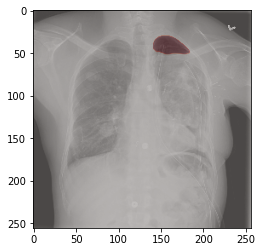

In [ ]:
rand_id = np.random.randint(len(final_train_df))
print(rand_id)
image_path = final_train_df['ImagePath_Png'].values[rand_id]
Predict(final_classify_model,final_segment_model, image_path)

***Testing the above pipeline with the test images:***

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Self Case Study 2/DATASET/Test Dataset/test_df.csv')
test_df.head(2)

,ImageId,ImagePath,ImagePath_Png
0,ID_c68e114ba,Train Dataset/siim/test_dicom_images/ID_c68e11...,Train Dataset/siim/test_png_images/ID_c68e114b...
1,ID_b5a797789,Train Dataset/siim/test_dicom_images/ID_b5a797...,Train Dataset/siim/test_png_images/ID_b5a79778...


Loading the CSV File that has all the classfication prediction for the test images :

In [ ]:
submission_df = pd.read_csv('/content/drive/MyDrive/Self Case Study 2/DATASET/Test Dataset/Pneumothorax_Classification_Submission_new.csv')
submission_df.tail(10)

,ImageId,EncodedPixels,Pneumothorax_Classification
3195,ID_0f5f33d71,-1,9.928751e-01
3196,ID_e42b91d9a,-1,9.709342e-01
3197,ID_bd4fa896c,-1,7.881337e-02
3198,ID_293b74bdf,-1,5.949005e-05
3199,ID_74441d7a9,-1,6.459855e-01
3200,ID_a9cc917b4,-1,4.487242e-05
3201,ID_5dc70172e,-1,2.613478e-06
3202,ID_f1b5e5378,-1,2.429515e-05
3203,ID_ba7f28dac,-1,3.086227e-07
3204,ID_77ab447a1,-1,9.998751e-01


In [ ]:
submission_df.head(10)

,ImageId,EncodedPixels,Pneumothorax_Classification
0,ID_c68e114ba,-1,7.935724e-08
1,ID_b5a797789,-1,2.585854e-04
2,ID_490a04f54,-1,8.629513e-01
3,ID_823ca20e1,-1,5.401402e-05
4,ID_5face2763,-1,2.972459e-08
5,ID_df5017c89,-1,4.879835e-06
6,ID_54b1c8c92,-1,5.710285e-05
7,ID_9979c1b39,-1,9.946896e-01
8,ID_f83ca5886,-1,8.424779e-01
9,ID_183d9cac6,-1,1.547788e-08


Checking with the test images:

No Pneumothorax Detection...!
Classifier Prediction Confidence : [[99.99991]]%


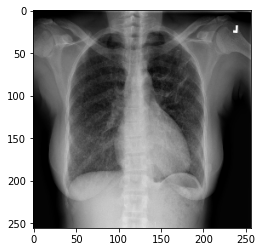

In [120]:
image_path = test_df['ImagePath_Png'].values[6]
Predict(final_classify_model,final_segment_model, image_path)

No Pneumothorax Detection...!
Classifier Prediction Confidence : [[99.99999]]%


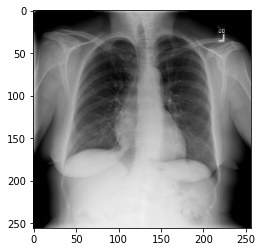

In [121]:
image_path = test_df['ImagePath_Png'].values[0]
Predict(final_classify_model,final_segment_model, image_path)

Pneumothorax Found..!!
Classifier Prediction Confidence : [[98.630035]]%


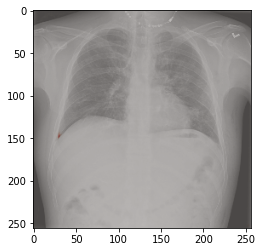

In [122]:
image_path = test_df['ImagePath_Png'].values[3195]
Predict(final_classify_model,final_segment_model, image_path)

Pneumothorax Found..!!
Classifier Prediction Confidence : [[87.70673]]%


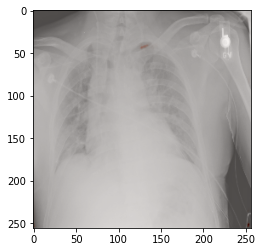

In [ ]:
image_path = test_df['ImagePath_Png'].values[3196]
Predict(final_classify_model,final_segment_model, image_path)

Pneumothorax Found..!!
Classifier Prediction Confidence : [[99.94648]]%


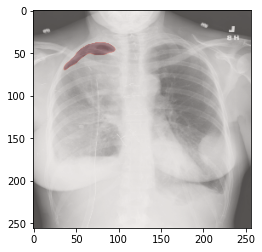

In [ ]:
image_path = test_df['ImagePath_Png'].values[3204]
Predict(final_classify_model,final_segment_model, image_path)

No Pneumothorax Detection...!
Classifier Prediction Confidence : [[99.506935]]%


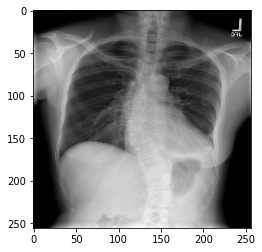

In [123]:
image_path = test_df['ImagePath_Png'].values[3197]
Predict(final_classify_model,final_segment_model, image_path)

Pneumothorax Found..!!
Classifier Prediction Confidence : [[98.67095]]%


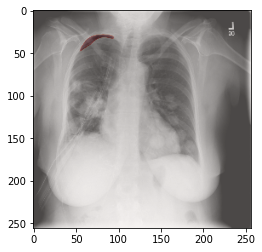

In [ ]:
image_path = test_df['ImagePath_Png'].values[3199]
Predict(final_classify_model,final_segment_model, image_path)

No Pneumothorax Detection...!
Classifier Prediction Confidence : [[99.99546]]%


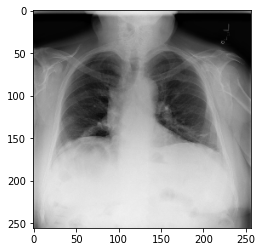

In [124]:
image_path = test_df['ImagePath_Png'].values[1]
Predict(final_classify_model,final_segment_model, image_path)

Pneumothorax Found..!!
Classifier Prediction Confidence : [[93.4191]]%


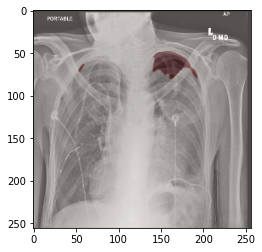

In [ ]:
image_path = test_df['ImagePath_Png'].values[8]
Predict(final_classify_model,final_segment_model, image_path)

Pneumothorax Found..!!
Classifier Prediction Confidence : [[99.82034]]%


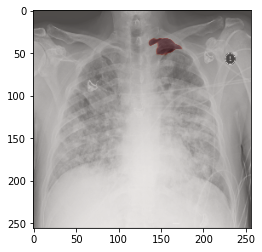

In [ ]:
image_path = test_df['ImagePath_Png'].values[7]
Predict(final_classify_model,final_segment_model, image_path)

Pneumothorax Found..!!
Classifier Prediction Confidence : [[60.182278]]%


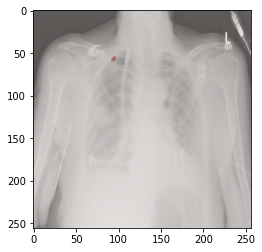

In [ ]:
image_path = test_df['ImagePath_Png'].values[11]
Predict(final_classify_model,final_segment_model, image_path)

Pneumothorax Found..!!
Classifier Prediction Confidence : [[88.24111]]%


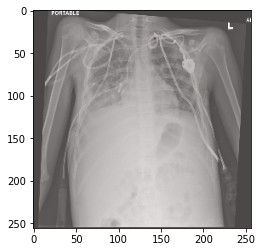

In [ ]:
image_path = test_df['ImagePath_Png'].values[24]
Predict(final_classify_model,final_segment_model, image_path)

Pneumothorax Found..!!
Classifier Prediction Confidence : [[99.93271]]%


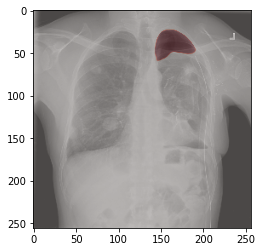

In [ ]:
image_path = test_df['ImagePath_Png'].values[26]
Predict(final_classify_model,final_segment_model, image_path)

No Pneumothorax Detection...!
Classifier Prediction Confidence : [[99.99999]]%


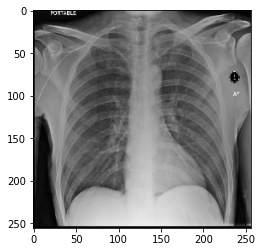

In [125]:
image_path = test_df['ImagePath_Png'].values[39]
Predict(final_classify_model,final_segment_model, image_path)